# Introduction

This dataset is a fictitious dataset that represents the tickets raised by customers to reach out to a cyber security team. There are various cyber related offerings that the team is providing to its customers. This notebook unravels the trends in this dataset, so to help the management to take decisions on improving their services.

# Importing Libraries & Dataset

Since this dataset is an excel file, we need to install openpyxl to import it. We'll also import other libraries like NumPy, Pandas, Matplotlib and Seaborn as we'd require them to analyse and visualize our data.

In [ ]:
!pip install openpyxl

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import openpyxl
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.1/242.1 KB 514.5 kB/s eta 0:00:00
/kaggle/input/ticket-management-dataset-cybersecurity/Ticket Details.xlsx


In [ ]:
df = pd.read_excel('../input/ticket-management-dataset-cybersecurity/Ticket Details.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 627 entries, 0 to 626
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Ticket No        627 non-null    object        
 1   Priority         627 non-null    object        
 2   State            627 non-null    object        
 3   Category         627 non-null    object        
 4   Sub Category     627 non-null    object        
 5   Skill Team       627 non-null    object        
 6   Hosting          627 non-null    object        
 7   Create Date      627 non-null    datetime64[ns]
 8   Picked Date      627 non-null    datetime64[ns]
 9   Completed Date   627 non-null    object        
 10  Assignee         627 non-null    object        
 11  Customer Rating  627 non-null    object        
 12  Outcome          627 non-null    object        
 13  Escalated        59 non-null     object        
 14  Reached via      627 non-null    object   

# Treating the missing values in the dataset

In [ ]:
df.isnull().sum()

Ticket No            0
Priority             0
State                0
Category             0
Sub Category         0
Skill Team           0
Hosting              0
Create Date          0
Picked Date          0
Completed Date       0
Assignee             0
Customer Rating      0
Outcome              0
Escalated          568
Reached via          0
dtype: int64

In [ ]:
df.sample(10)

,Ticket No,Priority,State,Category,Sub Category,Skill Team,Hosting,Create Date,Picked Date,Completed Date,Assignee,Customer Rating,Outcome,Escalated,Reached via
592,T65,Low,California,Data Privacy,HIPAA,Manufacturing,Vendor Cloud,2021-02-18 20:43:40,2021-02-18 20:49:27,2021-02-25 19:11:39,Charles,Excellent (5),Recommended Threat Assessment,NaN,Mail
349,T409,High,Washington,Data Privacy,PCI-DSS,Finance,On Prem Server,2021-08-14 01:33:17,2021-08-16 09:18:53,2021-08-20 18:47:07,Veronica,Excellent (5),Recommended Threat Assessment,NaN,Personal Call
145,T223,Medium,Colorado,Cyber Consultation,Segregation of Duties,Finance,On Prem Cloud,2021-05-11 18:15:29,2021-05-11 18:15:52,2021-05-13 11:10:23,Benny,Good (4),Advised for a risk assessment,NaN,Mail
267,T334,Medium,Hawaii,Data Privacy,GDPR,IT,On Prem Cloud,2021-07-08 01:39:57,2021-07-08 01:39:57,2021-07-08 01:39:57,Michael,Excellent (5),Advised for a risk assessment,NaN,Personal Call
450,T500,Low,California,Security Gap,Obsolete Software,Finance,Vendor Cloud,2021-09-28 18:44:27,2021-09-29 10:33:01,2021-10-01 11:17:12,Charles,Satisfactory (3),Advised for a risk assessment,NaN,Personal Call
559,T60,Low,Massachusetts,Data Privacy,Privacy Assessment,IT,On Prem Cloud,2021-02-14 13:09:02,2021-02-14 16:35:18,2021-02-18 17:02:56,Martina,Excellent (5),Advised for a risk assessment,NaN,Mail
383,T44,Medium,Wisconsin,Data Privacy,Privacy Assessment,IT,On Prem Server,2021-01-31 09:46:51,2021-01-31 09:47:20,2021-06-03 19:56:04,Allan,Satisfactory (3),Resolved,NaN,Ticket Portal
597,T70,High,New York,Data Privacy,HIPAA,HR,On Prem Server,2021-02-20 21:23:05,2021-02-20 21:27:39,2021-02-20 21:27:39,Martina,Excellent (5),Resolved,NaN,Ticket Portal
519,T563,High,California,Data Leak,Insider Threat,IT,On Prem Cloud,2021-11-09 19:19:59,2021-11-09 19:22:38,2021-12-21 18:56:02,Martina,Unsatisfactory (2),Recommended Threat Assessment,NaN,Ticket Portal
172,T248,High,New York,Data Privacy,HIPAA,HR,On Prem Server,2021-05-20 21:23:05,2021-05-20 21:27:39,2021-05-20 21:27:39,Martina,Excellent (5),Resolved,NaN,Personal Call


In [ ]:
df['Escalated'].unique()

array([nan, 'Yes', 'No'], dtype=object)

In [ ]:
df['Escalated'].fillna('No', inplace = True)

In [ ]:
df['Escalated'].unique()

array(['No', 'Yes'], dtype=object)

As we've filled the missing values, let us move on to the 'Completed Date' column. One of the rows contain the date as Feb-31 which is invalid. We'll remove the concerned row from the dataset.

In [ ]:
df.drop(df.index[df['Completed Date'] == "31-02-2021  11:30:57"], inplace = True)

In [ ]:
df['Completed Date'] = pd.to_datetime(df['Completed Date'])

# Finding response time and completion time of tickets

We'll find the response time by subtracting the time when the ticket was picked from the time when the ticket was raised by the customer. Similarly completion time can be calculated by subtracting the time when the ticket was completed from the time when the ticket was raised by the customer.

In [ ]:
df['Response Time'] = (df['Picked Date'] - df['Create Date']).dt.days
df['Completion Time'] = (df['Completed Date'] - df['Create Date']).dt.days
df.sample(3)

,Ticket No,Priority,State,Category,Sub Category,Skill Team,Hosting,Create Date,Picked Date,Completed Date,Assignee,Customer Rating,Outcome,Escalated,Reached via,Response Time,Completion Time
552,T593,Low,Pennsylvania,Data Leak,Phishing,IT,Vendor Cloud,2021-11-29 13:07:32,2021-11-29 13:10:01,2021-11-29 13:10:11,Allan,Excellent (5),Resolved,No,Personal Call,0,0
332,T393,Low,Texas,Cyber Consultation,Secure Development,Manufacturing,On Prem Server,2021-08-06 13:09:03,2021-08-06 13:10:16,2021-08-06 13:17:17,Veronica,Satisfactory (3),Resolved,No,Ticket Portal,0,0
166,T242,Medium,North Carolina,Data Leak,Phishing,Marketing,On Prem Server,2021-05-19 06:13:10,2021-05-19 06:18:05,2021-05-19 18:52:38,Benny,Excellent (5),Recommended Threat Assessment,No,Mail,0,0


# Visualizing the trends

In [ ]:
# Set the default text font size
plt.rc('font', size=12)
# Set the axes title font size
plt.rc('axes', titlesize=12)
# Set the axes labels font size
plt.rc('axes', labelsize=12)
# Set the font size for x tick labels
plt.rc('xtick', labelsize=11)
# Set the font size for y tick labels
plt.rc('ytick', labelsize=11)
# Set the legend font size
plt.rc('legend', fontsize=12)
# Set the font size of the figure title
plt.rc('figure', titlesize=20)

# #Tickets by Priority

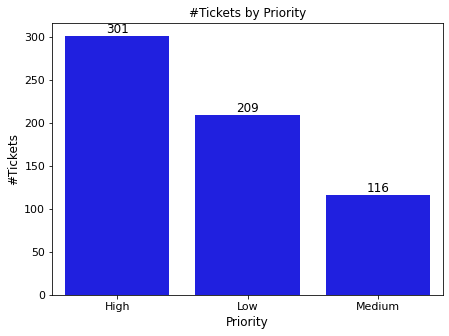

In [ ]:
priority_group = df.groupby('Priority')['Ticket No'].count().sort_values(ascending = False).reset_index()

plt.rcParams['figure.figsize'] = (7,5)
ax = sns.barplot(x = 'Priority', y = 'Ticket No', data = priority_group, color = 'blue')
for index, row in priority_group.iterrows():
    ax.text(row.name, row['Ticket No'], row['Ticket No'], ha = 'center', va = 'bottom')

plt.title("#Tickets by Priority")
plt.ylabel("#Tickets")
plt.show()

# #Tickets by Subcategory

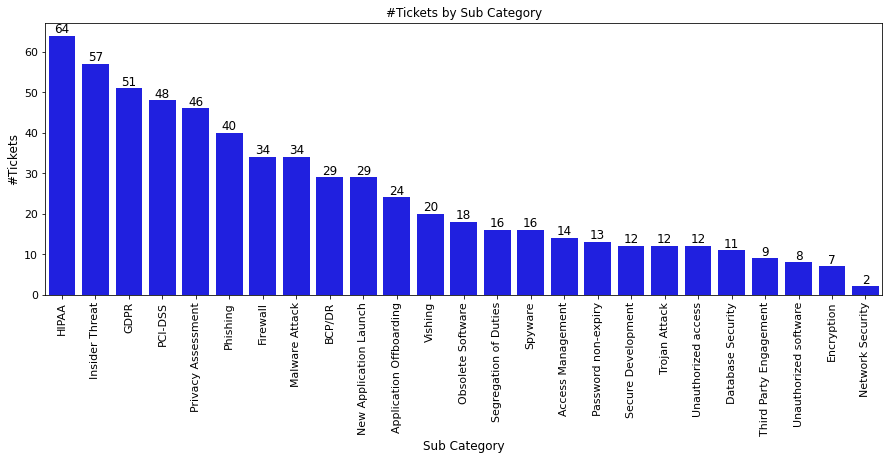

In [ ]:
subcategory_group = df.groupby('Sub Category')['Ticket No'].count().sort_values(ascending = False).reset_index()

plt.rcParams['figure.figsize'] = (15,5)
ax = sns.barplot(x = 'Sub Category', y = 'Ticket No', data = subcategory_group, color = 'blue')
for index, row in subcategory_group.iterrows():
    ax.text(row.name, row['Ticket No'], row['Ticket No'], ha = 'center', va = 'bottom')

plt.title("#Tickets by Sub Category")
plt.xticks(rotation = 90)
plt.ylabel("#Tickets")
plt.show()

# #Tickets by Category

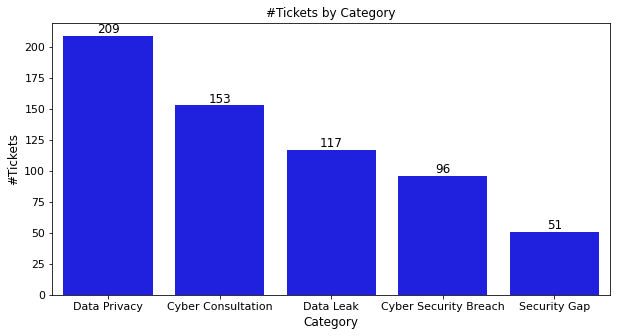

In [ ]:
category_group = df.groupby('Category')['Ticket No'].count().sort_values(ascending = False).reset_index()

plt.rcParams['figure.figsize'] = (10,5)
ax = sns.barplot(x = 'Category', y = 'Ticket No', data = category_group, color = 'blue')
for index, row in category_group.iterrows():
    ax.text(row.name, row['Ticket No'], row['Ticket No'], ha = 'center', va = 'bottom')

plt.title("#Tickets by Category")
plt.ylabel("#Tickets")
plt.show()

# %Tickets by Skill Team

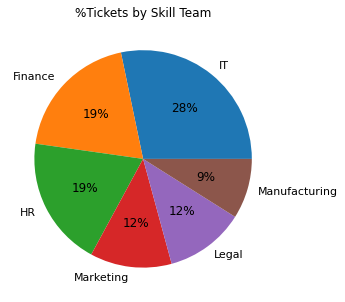

In [ ]:
team_group = df.groupby('Skill Team')['Ticket No'].count().sort_values(ascending = False).reset_index()

plt.rcParams['figure.figsize'] = (10,5)
plt.pie(team_group['Ticket No'], labels = team_group['Skill Team'], autopct = "%.0f%%")
plt.title("%Tickets by Skill Team")
plt.show()

# %Tickets by Mode of Reach

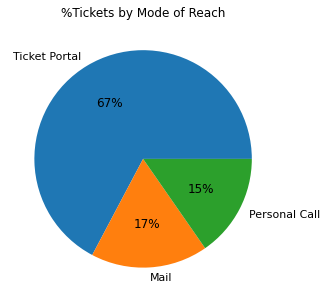

In [ ]:
reached_group = df.groupby('Reached via')['Ticket No'].count().sort_values(ascending = False).reset_index()

plt.rcParams['figure.figsize'] = (10,5)
plt.pie(reached_group['Ticket No'], labels = reached_group['Reached via'], autopct = "%.0f%%")
plt.title("%Tickets by Mode of Reach")
plt.show()

# #Tickets by Month when they were raised

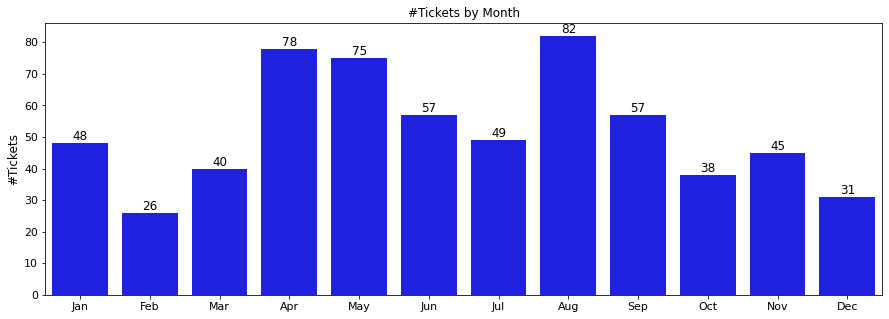

In [ ]:
month_group = df.groupby(df['Create Date'].dt.month)['Ticket No'].count().reset_index()

plt.rcParams['figure.figsize'] = (15,5)
ax = sns.barplot(data = month_group, x = 'Create Date', y = 'Ticket No', color = 'blue')
for index, row in month_group.iterrows():
    ax.text(row.name, row['Ticket No'], row['Ticket No'], ha = 'center', va = 'bottom')

plt.title('#Tickets by Month')
plt.xlabel(None)
plt.xticks(range(0,12), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.ylabel('#Tickets')
plt.show()

**Checking whether the ticket met the SLA for response time:**

In [ ]:
df['Response Time Group'] = df['Response Time'].apply(lambda x: 'Met SLA' if x<=0 else 'Breached SLA')

**Assigning tags to the tickets based on completion time**

In [ ]:
df.loc[df['Completion Time'] <= 10, 'Completion Time Group'] = "0 - 10 days"
df.loc[(df['Completion Time'] > 10) & (df['Completion Time'] <= 20), 'Completion Time Group'] = "11 - 20 days"
df.loc[df['Completion Time'] > 20, 'Completion Time Group'] = "More than 21 Days"

# #Tickets by State

In [ ]:
state_pivot = pd.pivot_table(data = df, index = 'State', values = 'Ticket No', aggfunc = 'count').sort_values('Ticket No', ascending = False).style.background_gradient(cmap='Set2')
state_pivot

,Ticket No
State,
California,131
New York,56
Florida,47
Texas,38
Virginia,38
Illinois,25
Utah,21
Georgia,19
New Jersey,19


# %Tickets that met SLA for Response Time

In [ ]:
response_time_pivot = pd.pivot_table(data=df, index = df['Create Date'].dt.month, columns = 'Response Time Group', values = 'Ticket No', aggfunc = 'count').fillna(0)
response_time_pivot['%Tickets Met SLA'] = round((response_time_pivot['Met SLA'] / (response_time_pivot['Breached SLA'] + response_time_pivot['Met SLA'])) * 100, 1)

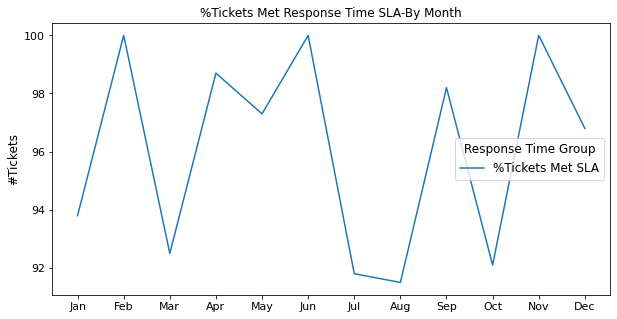

In [ ]:
plt.rcParams['figure.figsize'] = (10,5)
response_time_pivot[['%Tickets Met SLA']].plot()

plt.title('%Tickets Met Response Time SLA-By Month')
plt.xlabel(None)
plt.ylabel('#Tickets')
plt.xticks(range(1,13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.show()

# #Tickets by Completion Time

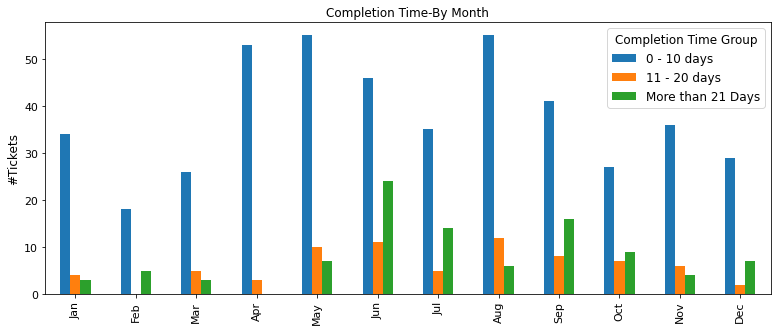

In [ ]:
plt.rcParams['figure.figsize'] = (13,5)

completion_time_pivot = pd.pivot_table(data=df, index = df['Completed Date'].dt.month, columns = 'Completion Time Group', values = 'Ticket No', aggfunc = 'count').fillna(0)
completion_time_pivot.plot(kind = 'bar')

plt.title('Completion Time-By Month')
plt.xlabel(None)
plt.ylabel('#Tickets')
plt.xticks(range(0,12), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.show()

# #Tickets by Assignee

In [ ]:
assignee_pivot = pd.pivot_table(data=df, index= df['Create Date'].dt.month, columns = 'Assignee', values = 'Ticket No', aggfunc = 'count').fillna(0)
assignee_pivot.reset_index(inplace = True)

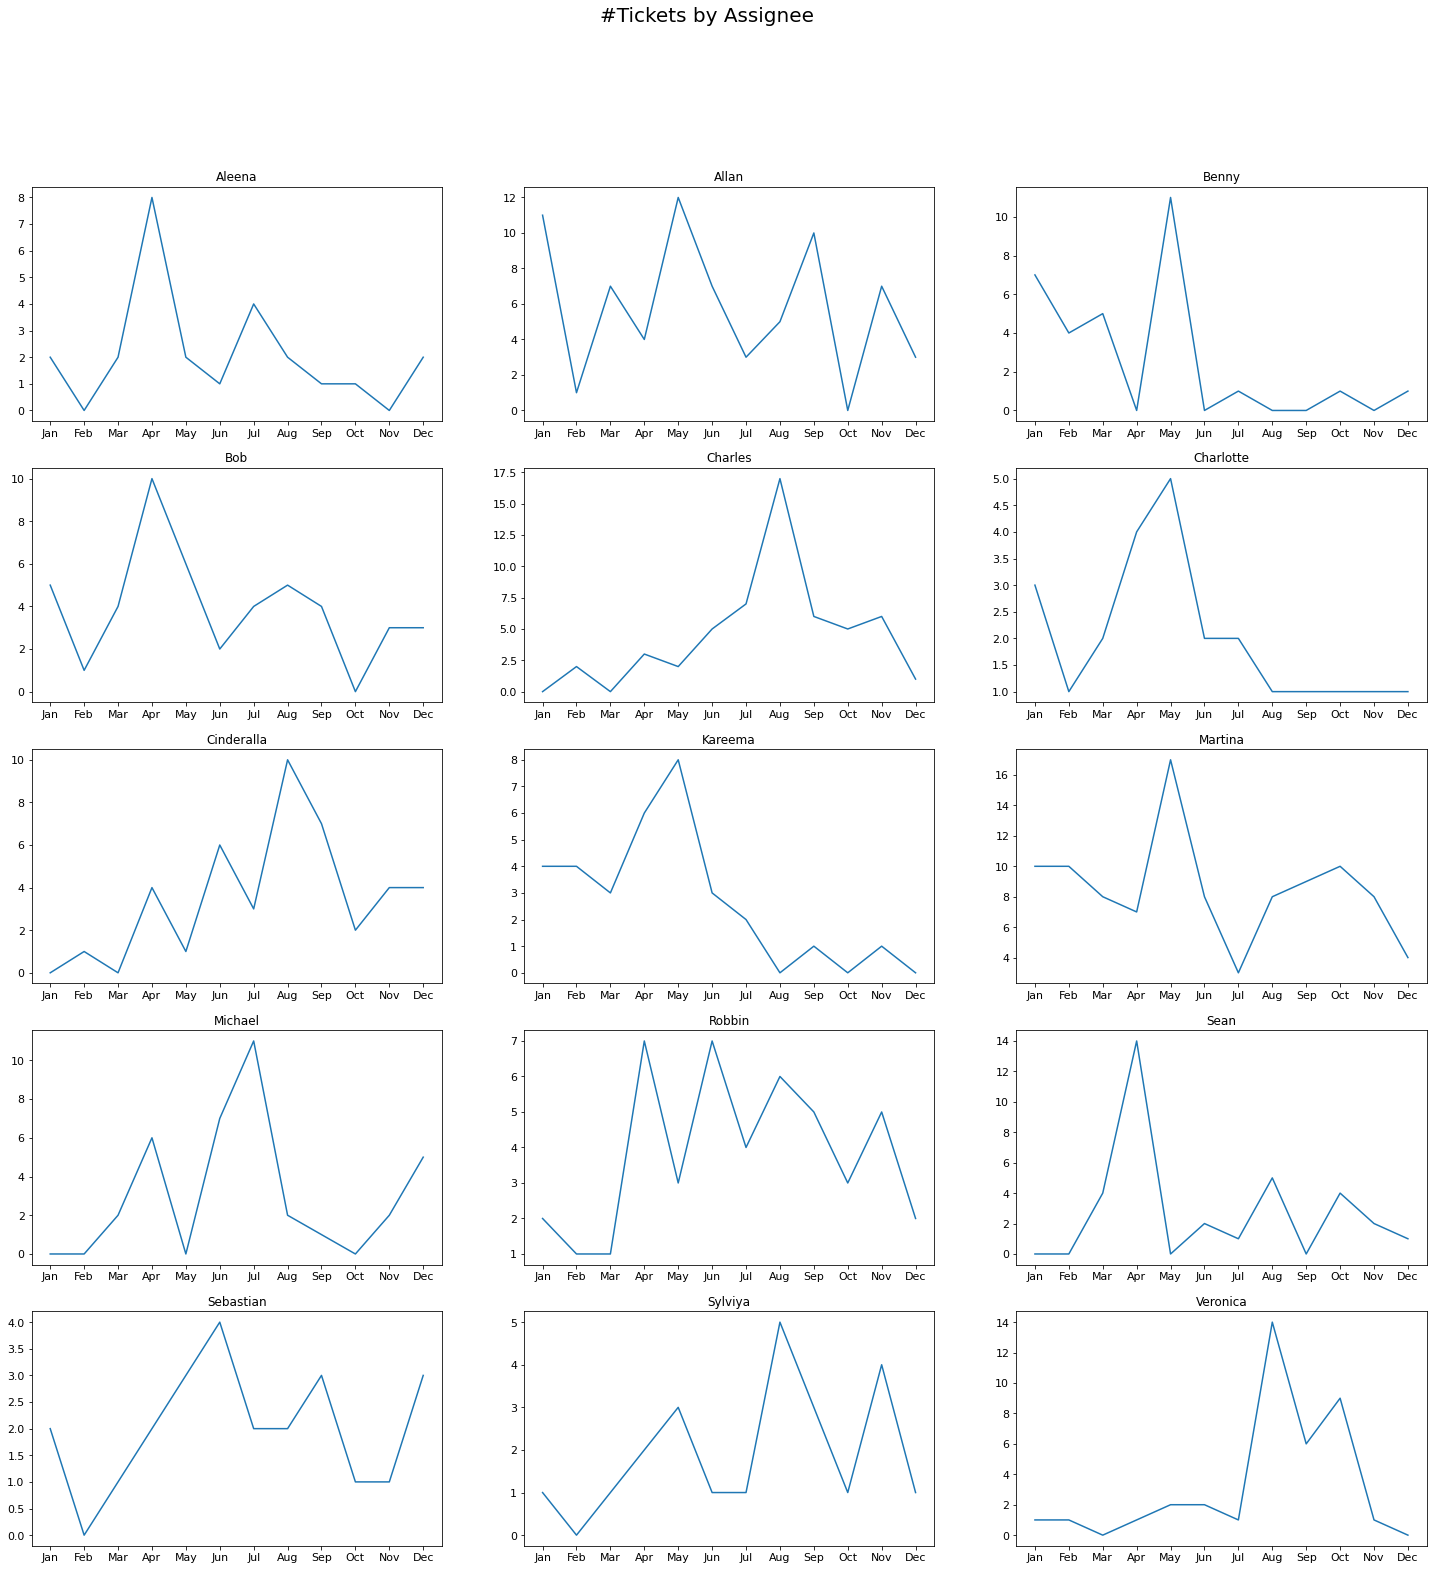

In [ ]:
plt.rcParams['figure.figsize'] = (25,25)
plt.suptitle('#Tickets by Assignee')

plt.subplot(5,3,1)
assignee_pivot['Aleena'].plot()
plt.xticks(range(0,12), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.title('Aleena')

plt.subplot(5,3,2)
assignee_pivot['Allan'].plot()
plt.xticks(range(0,12), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.title('Allan')

plt.subplot(5,3,3)
assignee_pivot['Benny'].plot()
plt.xticks(range(0,12), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.title('Benny')

plt.subplot(5,3,4)
assignee_pivot['Bob'].plot()
plt.xticks(range(0,12), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.title('Bob')

plt.subplot(5,3,5)
assignee_pivot['Charles'].plot()
plt.xticks(range(0,12), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.title('Charles')

plt.subplot(5,3,6)
assignee_pivot['Charlotte'].plot()
plt.xticks(range(0,12), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.title('Charlotte')

plt.subplot(5,3,7)
assignee_pivot['Cinderalla'].plot()
plt.xticks(range(0,12), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.title('Cinderalla')

plt.subplot(5,3,8)
assignee_pivot['Kareema'].plot()
plt.xticks(range(0,12), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.title('Kareema')

plt.subplot(5,3,9)
assignee_pivot['Martina'].plot()
plt.xticks(range(0,12), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.title('Martina')

plt.subplot(5,3,10)
assignee_pivot['Michael'].plot()
plt.xticks(range(0,12), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.title('Michael')

plt.subplot(5,3,11)
assignee_pivot['Robbin'].plot()
plt.xticks(range(0,12), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.title('Robbin')

plt.subplot(5,3,12)
assignee_pivot['Sean'].plot()
plt.xticks(range(0,12), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.title('Sean')

plt.subplot(5,3,13)
assignee_pivot['Sebastian'].plot()
plt.xticks(range(0,12), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.title('Sebastian')

plt.subplot(5,3,14)
assignee_pivot['Sylviya'].plot()
plt.xticks(range(0,12), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.title('Sylviya')

plt.subplot(5,3,15)
assignee_pivot['Veronica'].plot()
plt.xticks(range(0,12), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.title('Veronica')
plt.show()

# Conclusion

Based on the trends observed, the management can take the below actions.

1. Improving the response time of the tickets
1. Analyzing why certain tickets take a long time to get completed
1. Focussing on the assignees that pick lesser number of tickets comparing to their peers
1. Concentrating more on particular category/sub category


Thanks!